# Predicting Profit of the Startup Company

## 1. Mount the Google Drive






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Reading Data from Google Drive

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/data file/50_Startups.csv'
df = pd.read_csv(file_path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 3. Baisc Manipulation

In [ ]:
print(df.shape)
df
print(df.head())

(50, 5)
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10     NewYork  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62     NewYork  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
df = df.rename(columns={'R&D Spend': 'R&D_Spend'})
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.loc[0:4]
#df.iloc[0:3]

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df['R&D_Spend'].iloc[0:10]
df.iloc[0:10]['R&D_Spend']

0    165349.20
1    162597.70
2    153441.51
3    144372.41
4    142107.34
5    131876.90
6    134615.46
7    130298.13
8    120542.52
9    123334.88
Name: R&D_Spend, dtype: float64

In [ ]:
df.iloc[4][0:5]

R&D_Spend          142107.34
Administration      91391.77
Marketing_Spend    366168.42
State                Florida
Profit             166187.94
Name: 4, dtype: object

In [ ]:

df.iloc[3:5,0:5]

,R&D_Spend,Administration,Marketing_Spend,State,Profit
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
pd.concat([df.iloc[0:2,0:2],df.iloc[0:2,4:5]], axis = 1 )

,R&D_Spend,Administration,Profit
0,165349.2,136897.80,192261.83
1,162597.7,151377.59,191792.06


In [ ]:
s1 = df.iloc[0:2,0:1]
s2 = df.iloc[0:2,3:4]
pd.concat([s1,s2], axis = 1)

,R&D_Spend,State
0,165349.2,NewYork
1,162597.7,California


In [ ]:
df.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,47.000000,50.000000,46.000000,50.000000
mean,76588.533617,121344.639600,223798.738478,112012.639200
std,44679.180666,28017.802755,114467.029302,40306.180338
min,542.050000,51283.140000,1903.930000,14681.400000
25%,45041.985000,103730.875000,138615.667500,90138.902500
50%,73994.560000,122699.795000,221897.880000,107978.190000
75%,108218.345000,144842.180000,302423.767500,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
print('Mean of R&D_Spend = ',df['R&D_Spend'].mean())
print('std of R&D_Spend = ',df['R&D_Spend'].std())#计算平均值并打印只需更改函数名称
print('Min of R&D_Spend = ',df['R&D_Spend'].min())
print('25% of R&D_Spend = ',df['R&D_Spend'].quantile(0.25))
print('50% of R&D_Spend = ',df['R&D_Spend'].quantile(0.50))
print('75% of R&D_Spend = ',df['R&D_Spend'].quantile(0.75))
print('Max of R&D_Spend = ',df['R&D_Spend'].max())


Mean of R&D_Spend =  76588.53361702128
std of R&D_Spend =  44679.18066576926
Min of R&D_Spend =  542.05
25% of R&D_Spend =  45041.985
50% of R&D_Spend =  73994.56
75% of R&D_Spend =  108218.345
Max of R&D_Spend =  165349.2


In [ ]:
df.sample(50)

,R&D_Spend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,NewYork,64926.08
44,22177.74,154806.14,28334.72,California,65200.33
31,61136.38,152701.92,88218.23,NewYork,97483.56
15,114523.61,122616.84,261776.23,NewYork,129917.04
1,162597.70,151377.59,443898.53,California,191792.06
37,44069.95,51283.14,197029.42,California,89949.14
4,142107.34,91391.77,366168.42,Florida,166187.94
2,153441.51,101145.55,407934.54,Florida,191050.39
21,78389.47,153773.43,299737.29,NewYork,111313.02
3,144372.41,118671.85,383199.62,NewYork,182901.99


In [ ]:
weights = [0.9 if spend > 108218.345 else 0.1 for spend in df['R&D_Spend']]
weights_counts = pd.Series(weights).value_counts()
print(weights_counts)


0.1    38
0.9    12
dtype: int64


## 4. Data Visualization

1. Scatter plot (between RD Spend and Profit)
2. Histplot of RDSpend in Different States

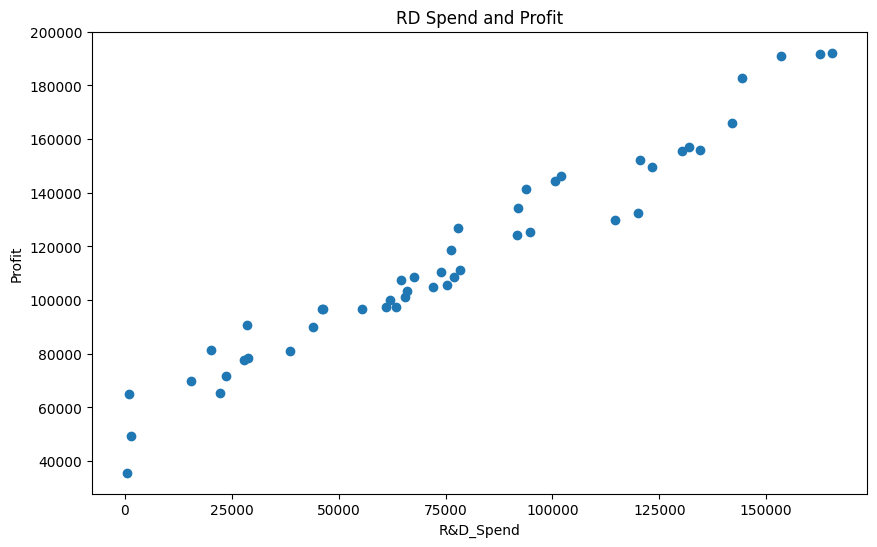

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['R&D_Spend'], df['Profit'])
plt.title('RD Spend and Profit')
plt.xlabel('R&D_Spend')
plt.ylabel('Profit')
plt.show()


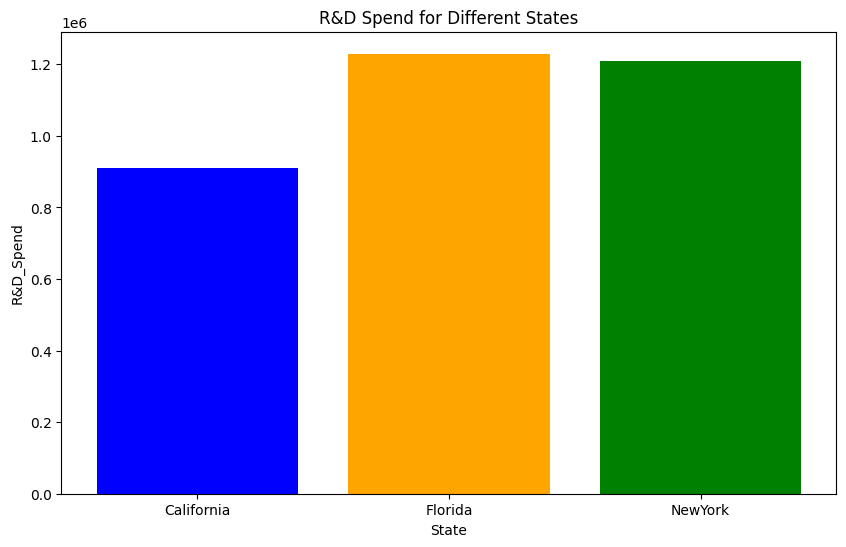

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
grouped = df.groupby('State')['R&D_Spend'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(grouped['State'],grouped['R&D_Spend'], color = ['blue','orange','green'])
plt.title('R&D Spend for Different States')
plt.xlabel('State')
plt.ylabel('R&D_Spend')

plt.show()

## 5. Data Preprocessing and Cleaning

#### 5.1 Types of Variables

In [ ]:
df.columns

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [ ]:
cat_features = [col for col in df.columns if df[col].dtype == '0']
print(cat_features)

[]


In [ ]:
num_features = [col for col in df.columns if df[col].dtype != '0']
print(num_features)

['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']


In [ ]:
df['R&D_Spend'] = df['R&D_Spend'].astype('category')
print(df['R&D_Spend'].cat.categories)
print(df['R&D_Spend'].dtype)


Float64Index([   542.05,   1000.23,   1315.46,  15505.73,  20229.59,  22177.74,
               23640.93,  27892.92,  28663.76,  28754.33,  38558.51,  44069.95,
               46014.02,  46426.07,  55493.95,  61136.38,  61994.48,  63408.86,
               64664.71,  65605.48,  66051.52,  67532.53,   72107.6,  73994.56,
               75328.87,  76253.86,  77044.01,  78013.11,  78389.47,  91749.16,
               91992.39,  93863.75,  94657.16, 100671.96, 101913.08, 114523.61,
              119943.24, 120542.52, 123334.88, 130298.13,  131876.9, 134615.46,
              142107.34, 144372.41, 153441.51,  162597.7,  165349.2],
             dtype='float64')
category


#### 5.2 Handling Categorical Variables

In [ ]:
# Convert Categorical (Ordinal) to Numeric

# Example dataframe with an ordinal variable
#data ={'Temperature':['Hot','Cold','Warm','Hot','Warm']}
#df = pd.DataFrame(data)

# import the lable encoder
#from sklearn.preprocessing import OrdinalEncoder
#encoder = OrdinalEncoder()
# Fit and transform the ordinal variable
#encoded_data = encoder.fit_transform(df[['Temperature']])
#df['Encoded_Temperature'] = encoded_data
#df.drop(['Temperature'], axis = 1)
#df

In [ ]:
# Convert Nominal variables to numerical (Dummy variables)
#df = pd.get_dummies(df,prefix_sep='_',drop_first=True)
#df.head()

#### 5.3 Outliers

In [ ]:
df.sort_values(by=['R&D_Spend'])

,R&D_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,NaN,NewYork,35673.41
45,1000.23,124153.04,1903.93,NewYork,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
43,15505.73,127382.30,35534.17,NewYork,69758.98
38,20229.59,65947.93,185265.10,NewYork,81229.06
44,22177.74,154806.14,28334.72,California,65200.33
42,23640.93,96189.63,148001.11,California,71498.49
41,27892.92,84710.77,164470.71,Florida,77798.83
36,28663.76,127056.21,201126.82,Florida,90708.19
40,28754.33,118546.05,172795.67,California,78239.91


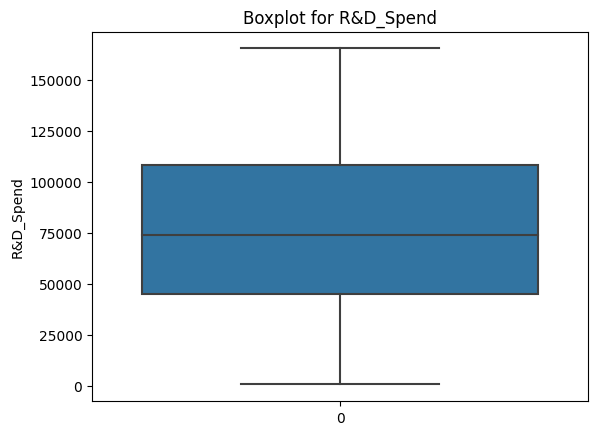

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['R&D_Spend'], whis = 1.5).set(title = 'Boxplot for R&D_Spend')
plt.ylabel('R&D_Spend')
plt.show()

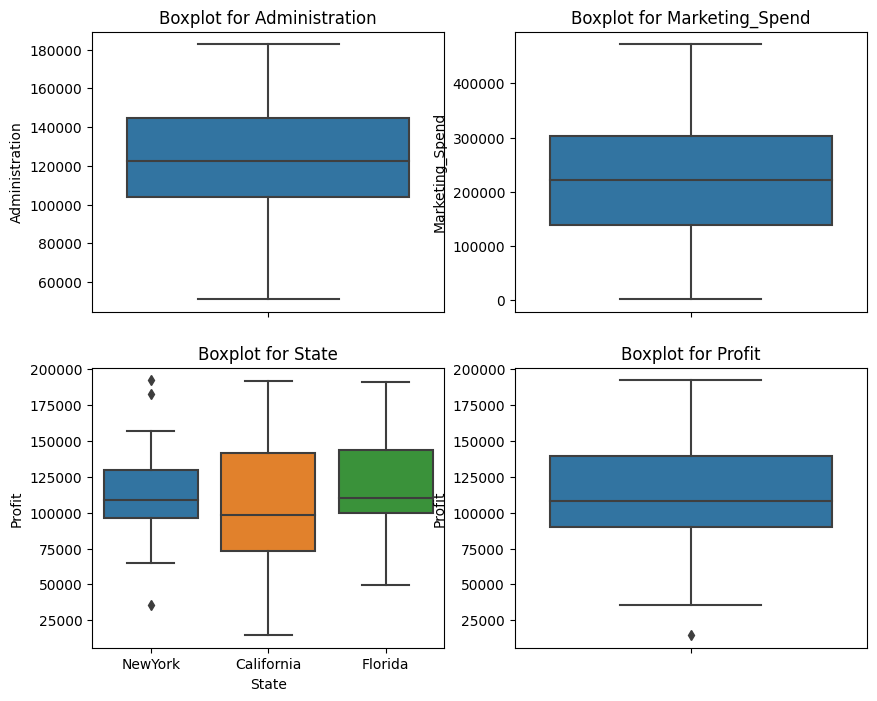

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, y='Administration', ax=axs[0, 0]).set(title='Boxplot for Administration')
sns.boxplot(data=df, y='Marketing_Spend', ax=axs[0, 1]).set(title='Boxplot for Marketing_Spend')
sns.boxplot(data=df, x='State', y='Profit', ax=axs[1, 0]).set(title='Boxplot for State')
sns.boxplot(data=df, y='Profit', ax=axs[1, 1]).set(title='Boxplot for Profit')

plt.show()



#### 5.4 Handling Missing Values

In [ ]:
df.isnull().sum()

R&D_Spend          3
Administration     0
Marketing_Spend    4
State              4
Profit             0
dtype: int64

In [ ]:
# Replace the missing values with median of the remaining values
median_market = df['Marketing_Spend'].median()
df['Marketing_Spend'] = df['Marketing_Spend'].fillna(value=median_market)
df['Marketing_Spend'].count()

50

In [ ]:
df['R&D_Spend'] = df['R&D_Spend'].astype(float)  # 将'R&D_Spend'列转换为浮点数类型
median_rd_spend = df['R&D_Spend'].median()
df['R&D_Spend'] = df['R&D_Spend'].fillna(value=median_rd_spend)
df['R&D_Spend'].count()


50

In [ ]:
import numpy as np


df['State'] = df['State'].replace('Unknown', np.nan)

# Calculate the mode
mode_state = df['State'].mode().iloc[0]

# Fill missing values with the mode
df['State'] = df['State'].fillna(mode_state).astype(str)


In [ ]:
df['State'] = df['State'].replace('California', 1)
df['State'] = df['State'].replace('Florida', 2)
df['State'] = df['State'].replace('NewYork', 3)

# similar with the code below

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['State'] = le.fit_transform(df['State'])

<function matplotlib.pyplot.show(close=None, block=None)>

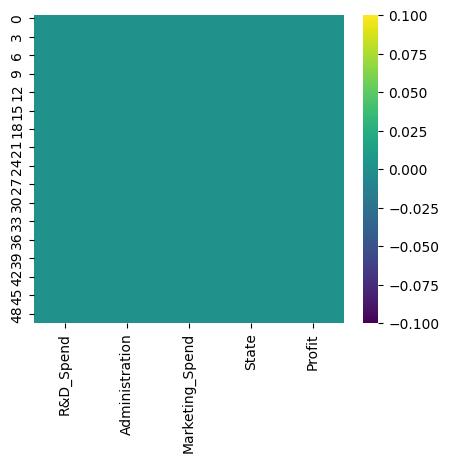

In [ ]:
plt.figure(figsize =(5,4))
sns.heatmap(df.isnull(),cmap ='viridis')
plt.show

In [ ]:
df.count()

R&D_Spend          50
Administration     50
Marketing_Spend    50
State              50
Profit             50
dtype: int64

In [ ]:
#import numpy as np
#missingRows = df.sample(10).index
#df.loc[missingRows,['R&D_Spend']] = np.nan
#print("Number of the aftersetting some values to missing values")
#df['R&D_Spend'].count()

<function matplotlib.pyplot.show(close=None, block=None)>

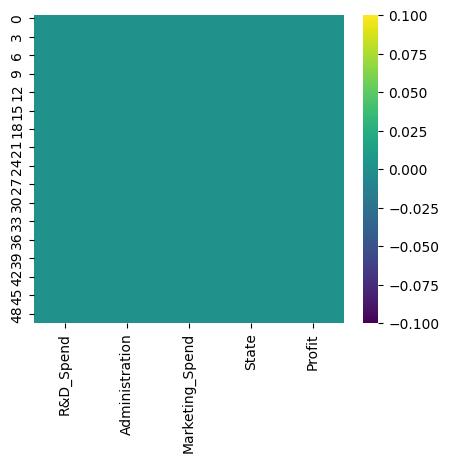

In [ ]:
plt.figure(figsize =(5,4))
sns.heatmap(df.isnull(),cmap ='viridis')
plt.show

In [ ]:
reduced_df = df.dropna()
len(reduced_df)#不含缺失值的行数

50

#### 5.5 Normalizing Data Using MinMax

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df),index = df.index, columns = df.columns)
norm_df.head()


,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,1.000000,0.651744,1.000000,1.0,1.000000
1,0.983305,0.761972,0.940654,0.0,0.997355
2,0.927748,0.379579,0.864115,0.5,0.993178
3,0.872719,0.512998,0.811474,1.0,0.947292
4,0.858975,0.305328,0.775228,0.5,0.853171


##5.6 Normalizing Data Using Standard

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df),index = df.index, columns = df.columns)
norm_df.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,2.074615,0.560753,2.284997,1.042597,2.011203
1,2.010416,1.082807,2.028210,-1.382047,1.999430
2,1.796782,-0.728257,1.697033,-0.169725,1.980842
3,1.585180,-0.096365,1.469259,1.042597,1.776627
4,1.532330,-1.079919,1.312425,-0.169725,1.357740


## 6. Data Partition in Python

In [ ]:
from sklearn.model_selection import train_test_split

# 将数据集拆分为训练集和验证集，测试集大小为20%，随机种子为1
trainData, validData = train_test_split(df, test_size=0.2, random_state=1)
print("Training:", trainData.shape)
print("Validation:", validData.shape)
print()

# 将数据集拆分为训练集、临时集，训练集大小为50%，随机种子为1
#trainData, temp = train_test_split(df, test_size=0.5, random_state=1)

# 在临时集中再将数据拆分为验证集和测试集，验证集大小为40%，随机种子为1
#validData, testData = train_test_split(temp, test_size=0.4, random_state=1)

#print("Training:", trainData.shape)
#print("Validation:", validData.shape)

Training: (40, 5)
Validation: (10, 5)



In [ ]:
from sklearn.linear_model import LinearRegression

# Create a list of predictors and Outcome (Target)
# housing_df.head()

X = df.drop(['Administration','State','Profit'], axis = 1) # inputs, remove the TAX and TOTAL_VALUE columns
y = df['Profit']            # output

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='mean')
#x = df.drop(['Administration', 'Profit'], axis=1)
#y = df['Administration']
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)
##model.fit(X_train, y_train)


## Building the Model on Training Data

In [ ]:
# 使用训练集数据进行预测
y_pred_train = model.predict(X_train)

# 创建包含真实值、预测值和残差的数据框
results_train = pd.DataFrame({'True_value': y_train,
               'predicted': y_pred_train,
               'residual': y_train - y_pred_train})

# 显示前10行结果
results_train.head(10)

,True_value,predicted,residual
32,97427.84,86507.849603,10919.990397
39,81005.76,85379.670781,-4373.910781
21,111313.02,121580.567615,-10267.547615
36,90708.19,82314.665512,8393.524488
19,122776.86,110935.720493,11841.139507
42,71498.49,73868.271196,-2369.781196
49,14681.40,92593.360277,-77911.960277
26,105733.54,102596.953391,3136.586609
22,110352.25,119386.487517,-9034.237517
13,134307.35,124636.616350,9670.733650


## Making Prediciton on Test (Validation) Data

In [ ]:
y_pred_test = model.predict(X_test)

results_test = pd.DataFrame({'True_value':y_test,
                'predicted': y_pred_test,
                'residual':y_test- y_pred_test})
results_test.head(10)

,True_value,predicted,residual
27,105008.31,123460.302054,-18451.992054
35,96479.51,92899.891847,3579.618153
40,78239.91,79427.037795,-1187.127795
38,81229.06,75744.297249,5484.762751
2,191050.39,176627.609739,14422.780261
3,182901.99,168765.600002,14136.389998
48,35673.41,68052.370998,-32378.960998
29,101004.64,94127.025267,6877.614733
46,49490.75,76310.674069,-26819.924069
31,97483.56,89554.124615,7929.435385


## Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# 计算模型在训练集上的 R-squared 分数
r2_score_train = r2_score(y_train, y_pred_train)
print("Performance score of the model on training data:", r2_score_train * 100)

# 计算模型在训练集上的均方误差（MSE）并计算根均方误差（RMSE）
MSE_train = mean_squared_error(y_train, y_pred_train)
RMSE_train = math.sqrt(MSE_train)
print("Root Mean Square Error (RMSE) on training data:")
print(RMSE_train)

# 计算模型在训练集上的平均绝对误差（MAE）
MAE_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE) on training data:")
print(MAE_train)


Performance score of the model on training data: 75.21228098692482
Root Mean Square Error (RMSE) on training data:
18566.573760562893
Mean Absolute Error (MAE) on training data:
10489.824033226158


In [ ]:
# Model performance for training Data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# r2_score
r2_score = r2_score(y_test, y_pred_test)
print("Performance score of the model on training data:", r2_score*100)

# Mean Square Error
MSE = mean_squared_error(y_test, y_pred_test)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", RMSE)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred_test)
print("Mean Abolute Error:", MAE)

Performance score of the model on training data: 88.22949419566393
Root Mean Square Error: 16341.721624976588
Mean Abolute Error: 13126.860619741434


In [ ]:
y_pred_test = model.predict([[165349.20,	471784.10]])
print("The predicted profit: " , y_pred_test)

The predicted profit:  [190206.58554032]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_test = model.predict([[162597.70,	443898.5]])
print("The predicted profit: " , y_pred_test)

The predicted profit:  [185705.9325749]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
